![dvd_image](dvd_image.jpg)

A DVD rental company needs your help! They want to figure out how many days a customer will rent a DVD for based on some features and has approached you for help. They want you to try out some regression models which will help predict the number of days a customer will rent a DVD for. The company wants a model which yeilds a MSE of 3 or less on a test set. The model you make will help the company become more efficient inventory planning.

The data they provided is in the csv file `rental_info.csv`. It has the following features:
- `"rental_date"`: The date (and time) the customer rents the DVD.
- `"return_date"`: The date (and time) the customer returns the DVD.
- `"amount"`: The amount paid by the customer for renting the DVD.
- `"amount_2"`: The square of `"amount"`.
- `"rental_rate"`: The rate at which the DVD is rented for.
- `"rental_rate_2"`: The square of `"rental_rate"`.
- `"release_year"`: The year the movie being rented was released.
- `"length"`: Lenght of the movie being rented, in minuites.
- `"length_2"`: The square of `"length"`.
- `"replacement_cost"`: The amount it will cost the company to replace the DVD.
- `"special_features"`: Any special features, for example trailers/deleted scenes that the DVD also has.
- `"NC-17"`, `"PG"`, `"PG-13"`, `"R"`: These columns are dummy variables of the rating of the movie. It takes the value 1 if the move is rated as the column name and 0 otherwise. For your convinience, the reference dummy has already been dropped.

In [52]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Import any additional modules and start coding below
#import data 
df=pd.read_csv("rental_info.csv", encoding = "ISO-8859-1")
# convert columns 
df['rental_date'] = pd.to_datetime(df['rental_date'])
df['return_date'] = pd.to_datetime(df['return_date'])
# create the new column 
df["rental_length_days"]=(df["return_date"] - df["rental_date"]).dt.days

# Create dummy variables for special_features based on pattern matching
df["deleted_scenes"] = np.where(df["special_features"].str.contains("Deleted Scenes"), 1, 0)
df["behind_the_scenes"] = np.where(df["special_features"].str.contains("Behind the Scenes"), 1, 0)

# Verify the number of ones in deleted_scenes
print("Number of ones in 'deleted_scenes':", df["deleted_scenes"].sum())

Number of ones in 'deleted_scenes': 7888


In [53]:
print(df.head())
print(df.dtypes)


                rental_date  ... behind_the_scenes
0 2005-05-25 02:54:33+00:00  ...                 1
1 2005-06-15 23:19:16+00:00  ...                 1
2 2005-07-10 04:27:45+00:00  ...                 1
3 2005-07-31 12:06:41+00:00  ...                 1
4 2005-08-19 12:30:04+00:00  ...                 1

[5 rows x 18 columns]
rental_date           datetime64[ns, UTC]
return_date           datetime64[ns, UTC]
amount                            float64
release_year                      float64
rental_rate                       float64
length                            float64
replacement_cost                  float64
special_features                   object
NC-17                               int64
PG                                  int64
PG-13                               int64
R                                   int64
amount_2                          float64
length_2                          float64
rental_rate_2                     float64
rental_length_days                  int64

In [54]:
# Prepare the feature 
features = [
    'amount', 'amount_2', 'rental_rate', 'rental_rate_2', 
    'release_year', 'length', 'length_2', 'replacement_cost', 
    'deleted_scenes', 'behind_the_scenes', 'NC-17', 'PG', 'PG-13', 'R'
]

X = df[features]

# Prepare the target vector 
y = df['rental_length_days']

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=9)

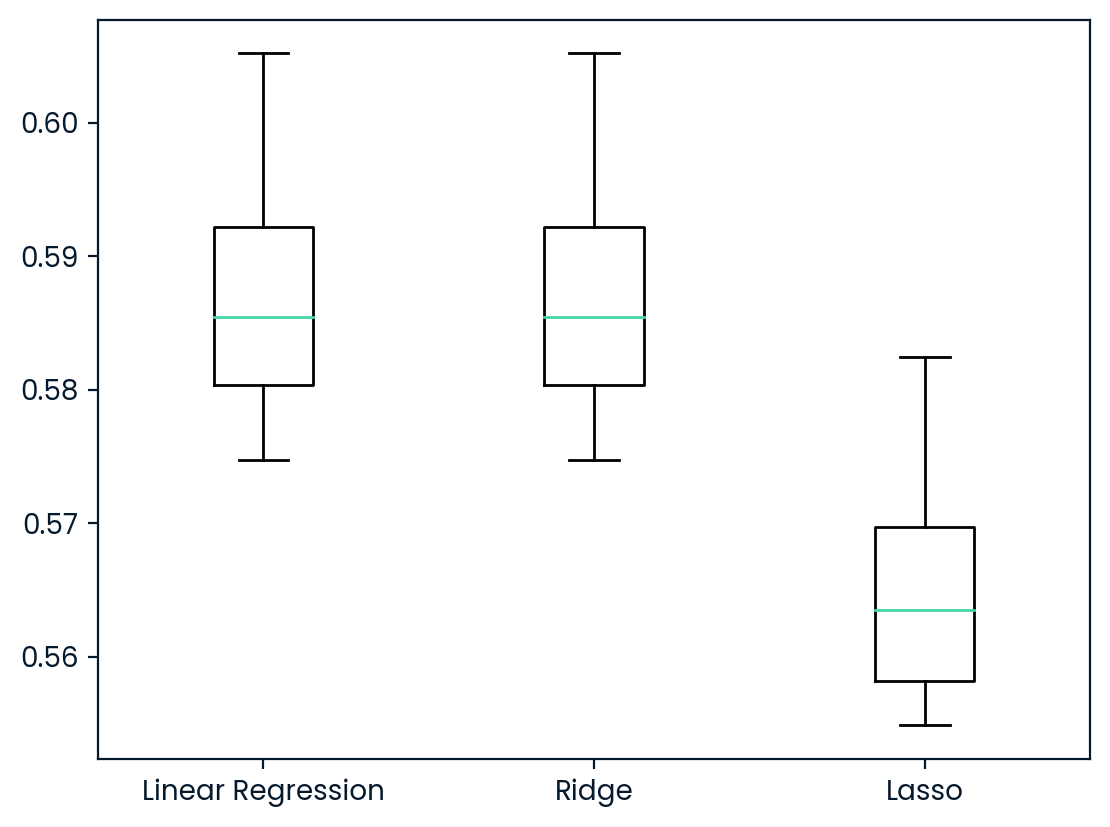

Linear Regression Test Set MSE: 2.9417238646976065
Ridge Test Set MSE: 2.9417273159308017
Lasso Test Set MSE: 3.1186207664658876


In [55]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_val_score,KFold
import matplotlib.pyplot as plt

models = {"Linear Regression": LinearRegression(), "Ridge": Ridge(alpha=0.1), "Lasso": Lasso(alpha=0.1)}
results = []


# Loop through the models' values
for model in models.values():
  kf = KFold(n_splits=6, random_state=42, shuffle=True)
  
  # Perform cross-validation
  cv_scores = cross_val_score(model,X_train, y_train, cv=kf)
  
  # Append the results
  results.append(cv_scores)


# Create a box plot of the results
plt.boxplot(results, labels=models.keys())
plt.show()

test_mse_s={}
for name, model in models.items():
  
  # Fit the model to the training data
  model.fit(X_train,y_train)
  
  # Make predictions on the test set
  y_pred = model.predict(X_test)
  
  # Calculate the test_rmse
  test_mse = mean_squared_error(y_test, y_pred)
  print("{} Test Set MSE: {}".format(name, test_mse))
  test_mse_s[name]=test_mse


In [56]:
best_model= models['Linear Regression']
best_mse= test_mse_s['Linear Regression']
print(best_model,best_mse)

LinearRegression() 2.9417238646976065
